In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(8,6)
plt.rcParams['figure.dpi']=200
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/ToyotaCorolla - MLR.csv')

In [3]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
df.tail()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015
1435,6950,76,1,Petrol,110,0,1600,5,4,5,1114


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


## **Remove Duplciate**

In [7]:
df.duplicated().sum()

np.int64(1)

In [8]:
df[df.duplicated(keep=False)]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
112,24950,8,13253,Diesel,116,0,2000,5,4,5,1320
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

# **Drop Column**

In [13]:
df['Cylinders']

,Cylinders
0,4
1,4
2,4
3,4
4,4
...,...
1431,4
1432,4
1433,4
1434,4


In [14]:
df['Cylinders'].value_counts() # same value in entire Cylinder column so dropping it.

,count
Cylinders,
4,1435


In [15]:
df.drop(columns=['Cylinders'],inplace=True)

In [16]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170


In [17]:
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Gears,0
Weight,0


# **Converting String into Numeric**

In [18]:
df['Fuel_Type'].value_counts()

,count
Fuel_Type,
Petrol,1264
Diesel,154
CNG,17


In [48]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [49]:
x=df.drop(columns=['Price'])
y=df['Price']

In [50]:
categorical_features=['Fuel_Type']
numeric_features=x.drop(columns=['Fuel_Type']).columns.tolist()

In [51]:
print(categorical_features)
print(numeric_features)

['Fuel_Type']
[' Age', 'KM', 'HP', 'Automatic', 'CC', 'Doors', 'Gears', 'Weight']


In [52]:
preprocessor = ColumnTransformer([('cat',OneHotEncoder(drop='first'),categorical_features),
                                  ('num','passthrough',numeric_features)])

In [53]:
df['Fuel_Type'].value_counts()

,count
Fuel_Type,
2,1264
1,154
0,17


# **Rename Column**

In [54]:
df.rename(columns={'Age_08_04' : ' Age',
                   'cc': 'CC'},inplace=True)

In [55]:
df

,Price,Age,KM,Fuel_Type,HP,Automatic,CC,Doors,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,5,1165
1,13750,23,72937,1,90,0,2000,3,5,1165
2,13950,24,41711,1,90,0,2000,3,5,1165
3,14950,26,48000,1,90,0,2000,3,5,1165
4,13750,30,38500,1,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,5,1025
1432,10845,72,19000,2,86,0,1300,3,5,1015
1433,8500,71,17016,2,86,0,1300,3,5,1015
1434,7250,70,16916,2,86,0,1300,3,5,1015


# **Summery Statistics**

In [27]:
df.describe()

,Price,Age,KM,Fuel_Type,HP,Automatic,CC,Doors,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,1.868990,101.491986,0.055749,1576.560976,4.032753,5.026481,1072.287108
std,3608.732978,18.563312,37491.094553,0.370993,14.981408,0.229517,424.387533,0.952667,0.188575,52.251882
min,4350.000000,1.000000,1.000000,0.000000,69.000000,0.000000,1300.000000,2.000000,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,2.000000,90.000000,0.000000,1400.000000,3.000000,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,2.000000,110.000000,0.000000,1600.000000,4.000000,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,2.000000,110.000000,0.000000,1600.000000,5.000000,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,2.000000,192.000000,1.000000,16000.000000,5.000000,6.000000,1615.000000


# **Visualization**

<Axes: >

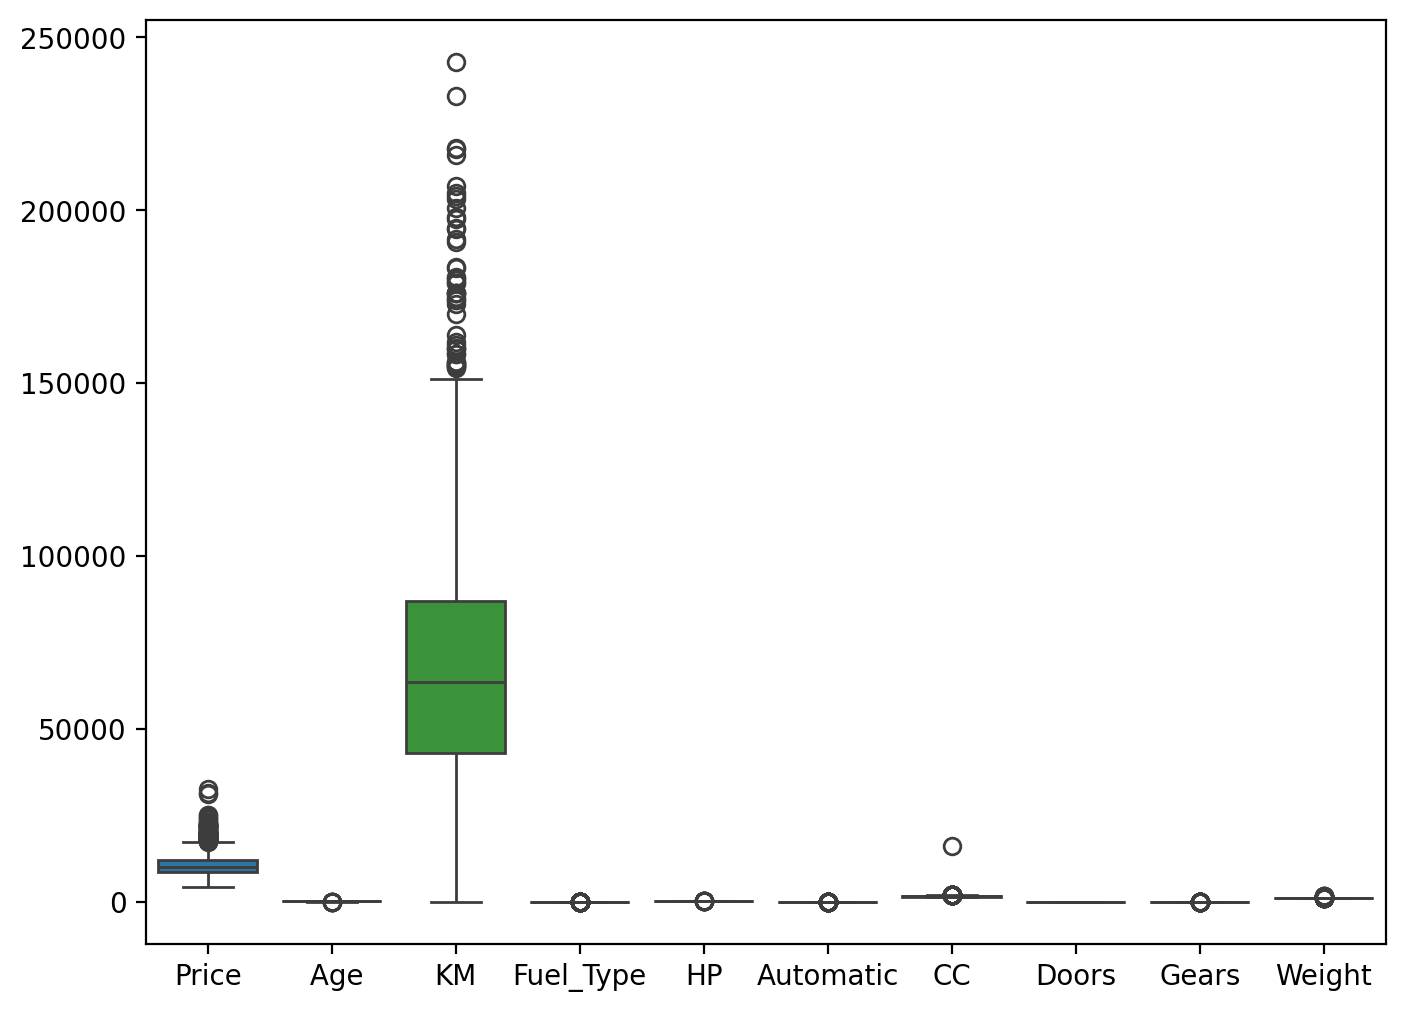

In [56]:
sns.boxplot(df)

In [57]:
numeric_col=df.select_dtypes(include=['int64','float64']).columns

In [58]:
numeric_col

Index(['Price', ' Age', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'CC', 'Doors',
       'Gears', 'Weight'],
      dtype='object')

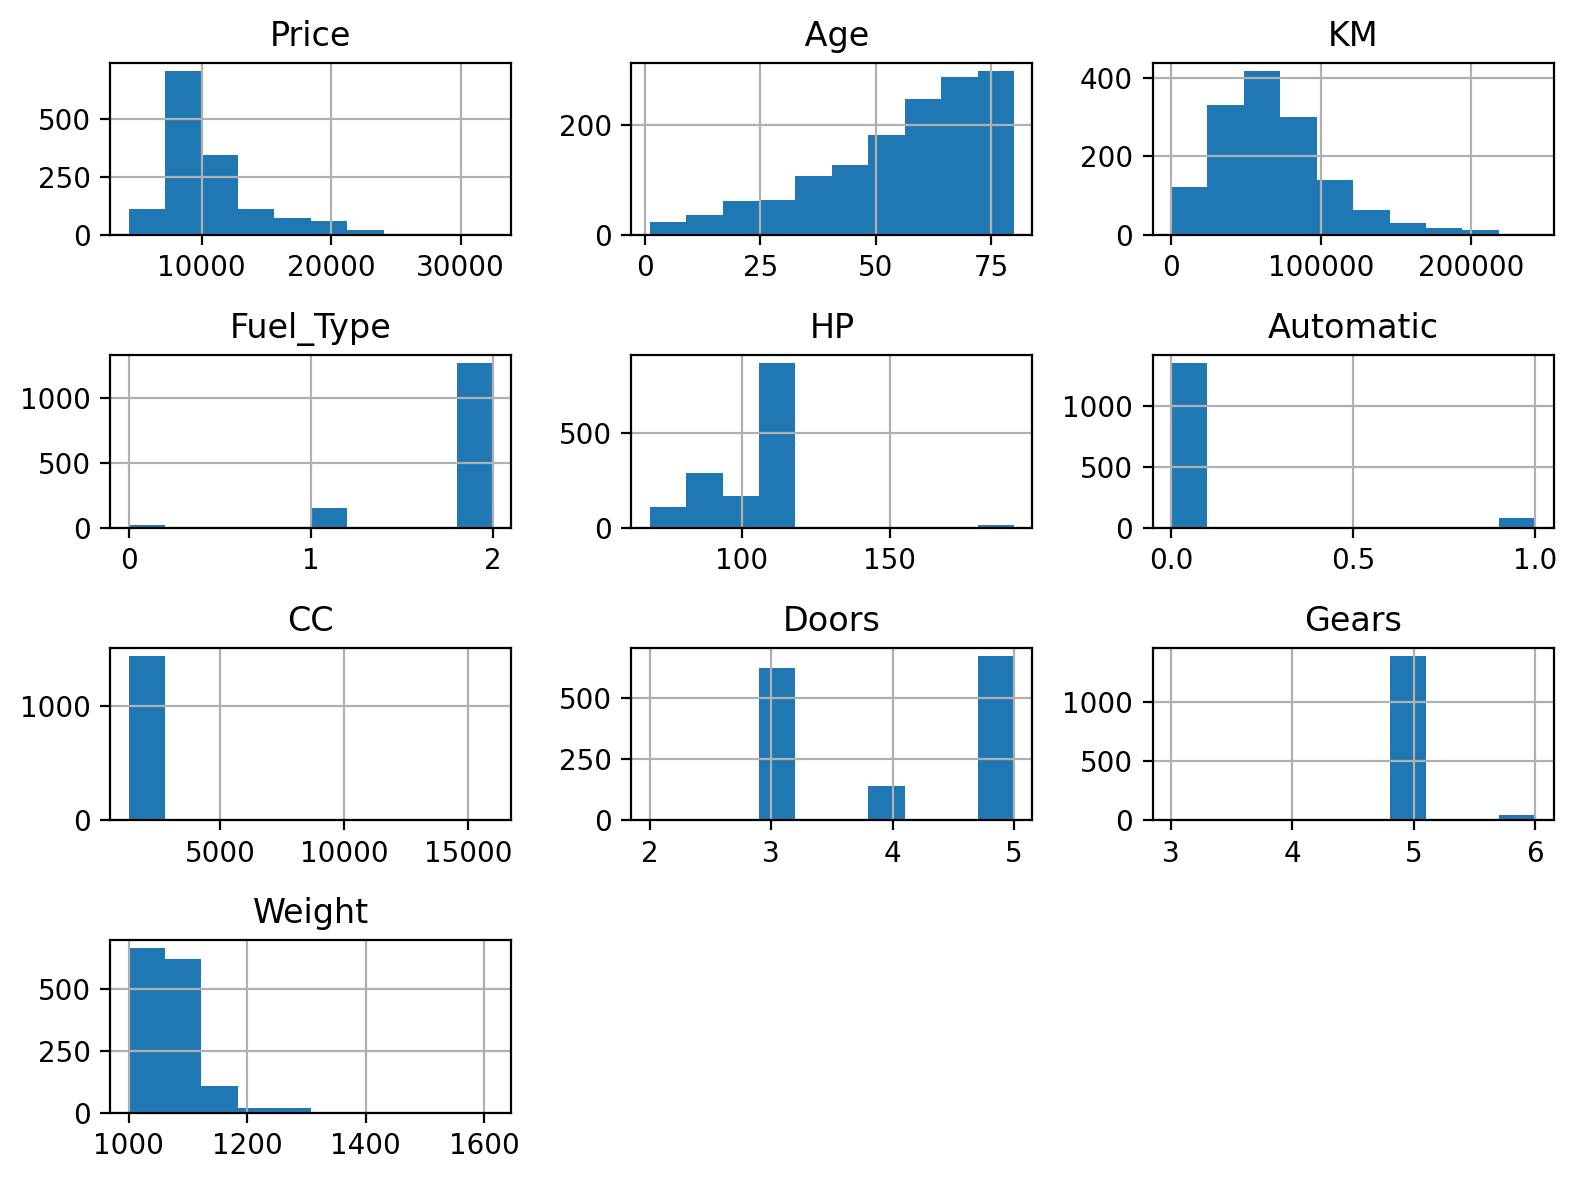

In [59]:
df[numeric_col].hist(bins=10)
plt.tight_layout()

# **Train-Test Split**

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# **Model_1**

In [75]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline

In [80]:
from sklearn.metrics import mean_squared_error,r2_score

In [76]:
model_1= Pipeline([('prepreocessor',preprocessor),
                   ('regressor',LinearRegression())])

In [77]:
model_1.fit(x_train, y_train)

Pipeline(steps=[('prepreocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Fuel_Type']),
                                                 ('num', 'passthrough',
                                                  [' Age', 'KM', 'HP',
                                                   'Automatic', 'CC', 'Doors',
                                                   'Gears', 'Weight'])])),
                ('regressor', LinearRegression())])

In [78]:
y_pred_1=model_1.predict(x_test)

In [82]:
mean_squared_error(y_test,y_pred_1)

2155628.3561398825

In [81]:
r2_score(y_test,y_pred_1)

0.8203213869961592

# **Model_2**

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
scalar = StandardScaler()

In [85]:
scaled_preprocessor=ColumnTransformer([('cat',OneHotEncoder(drop='first'),categorical_features),
                                       ('num',scalar,numeric_features)])

In [87]:
model_2=Pipeline([('preprocessor',scaled_preprocessor),
                  ('regressor',LinearRegression())])

In [88]:
model_2.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Fuel_Type']),
                                                 ('num', StandardScaler(),
                                                  [' Age', 'KM', 'HP',
                                                   'Automatic', 'CC', 'Doors',
                                                   'Gears', 'Weight'])])),
                ('regressor', LinearRegression())])

In [89]:
y_pred_2=model_2.predict(x_test)

In [90]:
mean_squared_error(y_test,y_pred_2)

2155628.356139625

In [91]:
r2_score(y_test,y_pred_2)

0.8203213869961807

# **Model_3**

In [92]:
from sklearn.preprocessing import PolynomialFeatures

In [106]:
poly_features = PolynomialFeatures(degree=2,include_bias=False)

In [107]:
Model_3=Pipeline([('preprocessor',preprocessor),
                  ('poly',poly_features),
                  ('regressor',LinearRegression())])

In [108]:
model_3.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Fuel_Type']),
                                                 ('num', StandardScaler(),
                                                  [' Age', 'KM', 'HP',
                                                   'Automatic', 'CC', 'Doors',
                                                   'Gears', 'Weight'])])),
                ('regressor', LinearRegression())])

In [109]:
y_pred_3=model_3.predict(x_test)

In [110]:
mean_squared_error(y_test,y_pred_3)

2155628.356139625

In [111]:
r2_score(y_test,y_pred_3)

0.8203213869961807

# **Ridge**

In [113]:
ridge=Pipeline([('preprpcessor',preprocessor),
                ('refressor',Ridge(alpha=1.0))])

In [114]:
ridge.fit(x_train,y_train)

Pipeline(steps=[('preprpcessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Fuel_Type']),
                                                 ('num', 'passthrough',
                                                  [' Age', 'KM', 'HP',
                                                   'Automatic', 'CC', 'Doors',
                                                   'Gears', 'Weight'])])),
                ('refressor', Ridge())])

In [116]:
y_pred_ridge=ridge.predict(x_test)

In [117]:
mean_squared_error(y_test,y_pred_ridge)

2152506.13363821

In [118]:
r2_score(y_test,y_pred_ridge)

0.8205816343653275

# **Lasso**

In [119]:
lasso=Pipeline([('preprocessor',scaled_preprocessor),
                ('regressor',Lasso(alpha=1.0))])

In [120]:
lasso.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Fuel_Type']),
                                                 ('num', StandardScaler(),
                                                  [' Age', 'KM', 'HP',
                                                   'Automatic', 'CC', 'Doors',
                                                   'Gears', 'Weight'])])),
                ('regressor', Lasso())])

In [121]:
y_lasso_pred=lasso.predict(x_test)

In [122]:
mean_squared_error(y_test,y_lasso_pred)

2143839.980374631

In [123]:
r2_score(y_test,y_lasso_pred)

0.8213039863394251

# **Normalization & Standardization**

In [126]:
'''
The tearms called Normalization and Standardization are used for the scaling down the data.
There is many types of variables are present which have low digit to high digit.

we as this terms for convert data in single scale.

Formula for NORMALIZATION is x-x.min/x.max-x.min
after using this data changed into 0 to 1 range.

Formula for STANDARDIZATION is if sigma is known x-mu/ sigma
                               if sigma unkown x-x.min/x.std
after standardization data converted into -3 to 3 range
   their mean will be always 0 and standard deviation will 1.

this fuctions basically use for distance baded calcultions in machine learning algorithems.
for the better accuracy.
'''


'\nThe tearms called Normalization and Standardization are used for the scaling down the data.\nThere is many types of variables are present which have low digit to high digit.\n\nwe as this terms for convert data in single scale.\n\nFormula for NORMALIZATION is x-x.min/x.max-x.min\nafter using this data changed into 0 to 1 range.\n\nFormula for STANDARDIZATION is if sigma is known x-mu/ sigma \n                               if sigma unkown x-x.min/x.std\nafter standardization data converted into -3 to 3 range \n   their mean will be always 0 and standard deviation will 1.\n\nthis fuctions basically use for distance baded calcultions in machine learning algorithems.\nfor the better accuracy.\n'

# **Multicolinearity**

In [128]:
'''
It occurs when the independent variables of data set are highly correlated.

There are many techniques for the address it.
1. Use correlation matrics.
2. Variance Inflation Factor (VIF). Drop 1 of the variables in highly correlated Pair.
3. Principle Component Analysis (PCA).

'''


'\nIt occurs when the independent variables of data set are highly correlated.\n\nThere are many techniques for the address it.\n1. Use correlation matrics.\n2. Variance Inflation Factor (VIF). Drop 1 of the variables in highly correlated Pair.\n3. Principle Component Analysis (PCA).\n\n'